## <font color='purple'>SML ASSIGNMENT 1 : Assignment 1: Linear Regression  </font>
### Kaustubh Raykar
PRN : 21070126048  , AIML A3 
<break> <font color='teal'>POSITION LEVEL DATASET</font>

### <font color='teal'>Step 1 : Importing Libraries </font>

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### <font color='teal'> Step 2: Upload Dataset </font>

In [117]:
df=pd.read_csv("D:\position_salaries.csv")
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


### <font color='teal'>Step 3: Data Description </font>

In [118]:
df.head(6)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000


In [119]:
df.shape

(10, 3)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [121]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


### <font color='teal'>Step 4 : Data Cleaning </font>

In [122]:
df.dtypes

Position    object
Level        int64
Salary       int64
dtype: object

In [123]:
df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

### <font color='teal'>Step 5: Data Visualisation</font>

In [124]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


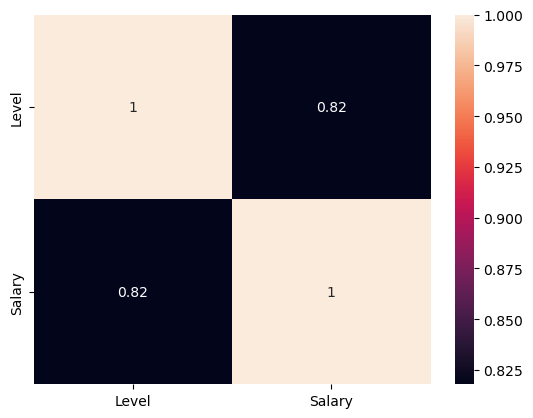

In [125]:
import seaborn as sns
sns.heatmap(df.corr(), annot = True);

### <font color='teal'>Step 6: Data Preparation- Splitting the data into train and test set </font>

In [126]:
#splitting into x and y 
x = df['Level'].values
y = df['Salary'].values

In [127]:
# x is independent feature 
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [128]:
# y is dependent feature 
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

### <font color='teal'>Step 7: Plotting the data </font>

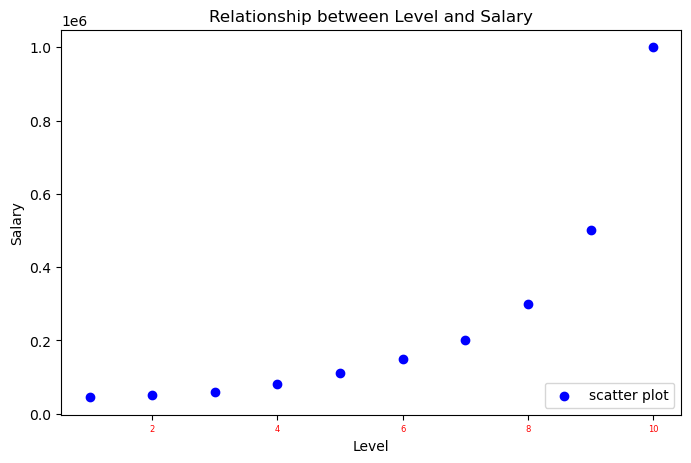

In [129]:
# scatter plot
plt.figure(figsize=(8,5))
plt.scatter(x,y,color = 'blue', label='scatter plot')
plt.title('Relationship between Level and Salary')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.xticks()
plt.legend(loc=4) #puts scatter plot written on the graph 
#plt.setp(x ,rotation=30, horizontalalignment='right')
plt.tick_params(axis='x', labelcolor='red', labelsize=6)
plt.show()

In [130]:
#know shape of my dataset (to check for mismatch , both should be the same )
x.shape

(10,)

In [131]:
y.shape #both are the same

(10,)

### <font color='teal'>Step 7: Reshaping the data </font>

In [132]:
#reshape the model now  , ((-1,1) is when one feature is there (one feature , not one value))

# reshape- model doesn’t know to consider it as a row or a column
# when consider it as row - many features ,
# when column - multiple values 
x=x.reshape(-1,1)
y=y.reshape(-1,1)

In [133]:
x.shape

(10, 1)

In [134]:
y.shape

(10, 1)

### <font color='teal'>Step 8 : Split x and y into training and test data set  </font>

In [135]:
#split x and y into training and test data set 

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [136]:
#x in train testing values in x and y 
#y in train testing values in x and y 
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8, 1)
(2, 1)
(8, 1)
(2, 1)


### <font color='teal'>Step 9: Import Linear Regression Model  </font>

In [137]:
# we import linear regression model 

#instantiate the linear regression object 
from sklearn.linear_model import LinearRegression
ln = LinearRegression()

### <font color='teal'>Step 10 : Fitting the data </font>

In [138]:
#train the model using trainig datasets 
ln.fit(x_train,y_train)

#predict the test data(here we will only send x )
y_pred = ln.predict(x_test)

### <font color='teal'>Step 11: Predicting Values of y </font>

In [139]:
#predicting sales values , based on the x values already given
ln.predict(x)[2:10]

array([[ 23405.17241379],
       [111293.10344828],
       [199181.03448276],
       [287068.96551724],
       [374956.89655172],
       [462844.82758621],
       [550732.75862069],
       [638620.68965517]])

In [140]:
#to make individual predictions using the linear regression model

str(ln.predict([[10]]))

'[[638620.68965517]]'

### <font color='teal'> Step 12 : Calculate Mean Squared Error (MSE)  </font>

In [141]:
#calcute the print root mean square (PMSE)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred) 
rase = np.sqrt(mse) 
print("MSE value: {:.4f}".format(rase))

MSE value: 88544.0987


### <font color='teal'>Step 13 Calculate R2 Score Value </font>

In [142]:
#r2 , the value more closer to 1 , the better
from sklearn.metrics import r2_score 
print("R2 score value: {:.4f}".format(r2_score(y_test,y_pred)))

R2 score value: 0.8451


### <font color='teal'>Step 14: Plotting the predicted data </font>

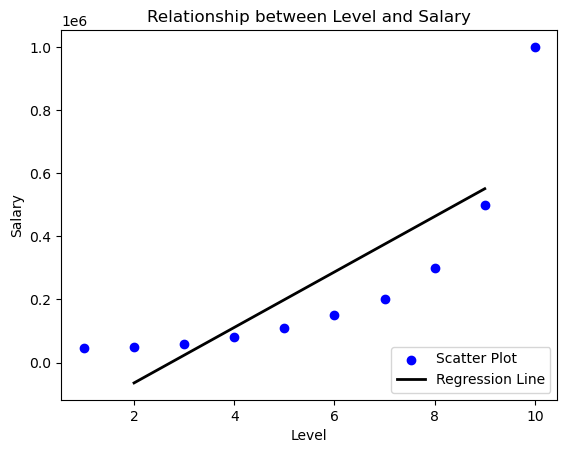

In [143]:
plt.scatter(x, y, color = 'blue', label='Scatter Plot')
plt.plot(x_test, y_pred, color="black", linewidth=2, label='Regression Line') 
plt.title('Relationship between Level and Salary')
plt.xlabel('Level') 
plt.ylabel('Salary')
plt.legend(loc=4)
plt.show()

### <font color='teal'>Step 15 : Checking Underfitting or Overfitting of Data </font>

In [144]:
#Checking for Overfitting or Underfitting the data

print("Training set score: {:.4f}".format(ln.score(x_train,y_train)))
print("Test set score: {:.4f}".format(ln.score(x_test,y_test)))

Training set score: 0.6366
Test set score: 0.8451


## THANK YOU 